In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization
from tensorflow.keras.layers import MaxPool2D, GlobalAvgPool2D
from tensorflow.keras.layers import Add, ReLU, Dense
from tensorflow.keras import Model

In [ ]:
def conv_batchnorm_relu(x, filters, kernel_size, strides=1):
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

In [ ]:
def identity_block(tensor, filters):
    x = conv_batchnorm_relu(tensor, filters=filters, kernel_size=1, strides=1)
    x = conv_batchnorm_relu(x, filters=filters, kernel_size=3, strides=1)
    x = Conv2D(filters=4*filters, kernel_size=1, strides=1)(x)
    x = BatchNormalization()(x)
    x = Add()([tensor,x])    #skip connection before relu
    x = ReLU()(x)
    return x

In [ ]:
def projection_block(tensor, filters, strides): 
         
     #left stream     
     x = conv_batchnorm_relu(tensor, filters=filters, kernel_size=1, strides=strides)     
     x = conv_batchnorm_relu(x, filters=filters, kernel_size=3, strides=1)     
     x = Conv2D(filters=4*filters, kernel_size=1, strides=1)(x)     
     x = BatchNormalization()(x) 
         
     #right stream     
     shortcut = Conv2D(filters=4*filters, kernel_size=1, strides=strides)(tensor)     
     shortcut = BatchNormalization()(shortcut)          
     x = Add()([shortcut,x])    #skip connection     
     x = ReLU()(x)          
     return x

In [ ]:
def resnet_block(x, filters, reps, strides):
    
    x = projection_block(x, filters, strides)
    for _ in range(reps-1):
        x = identity_block(x,filters)
    return x

In [ ]:
INPUT_SHAPE = (224 , 224,3)
NUMBER_OF_CLASSESS = 2 

In [ ]:
input = Input(shape=INPUT_SHAPE)

x = conv_batchnorm_relu(input, filters=64, kernel_size=7, strides=2)
x = MaxPool2D(pool_size = 3, strides =2)(x)
x = resnet_block(x, filters=64, reps =3, strides=1)
x = resnet_block(x, filters=128, reps =4, strides=2)
x = resnet_block(x, filters=256, reps =6, strides=2)
x = resnet_block(x, filters=512, reps =3, strides=2)
x = GlobalAvgPool2D()(x)

output = Dense(NUMBER_OF_CLASSESS, activation ='softmax')(x)

model = Model(inputs=input, outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 112, 112, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
from tensorflow.keras.utils import plot_model

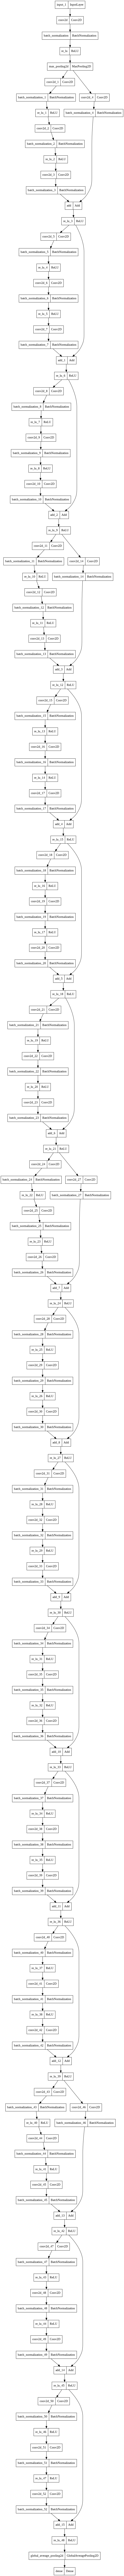

In [ ]:
plot_model(model)